In [4]:
import numpy as np
import pandas as pd 

import os
import glob

import cv2
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import img_to_array
from keras.utils import np_utils
from numba import jit, cuda


import time

2022-10-24 12:14:16.639029: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
coordinates_path = './list_bbox_celeba.txt'
photos_path = '../../img_celeba/'

LIMIT = 1000

In [6]:
image_names = os.listdir(photos_path)
image_names.sort()
image_names = image_names[:LIMIT]

labels = pd.read_csv(coordinates_path, sep='\s+')[:LIMIT]

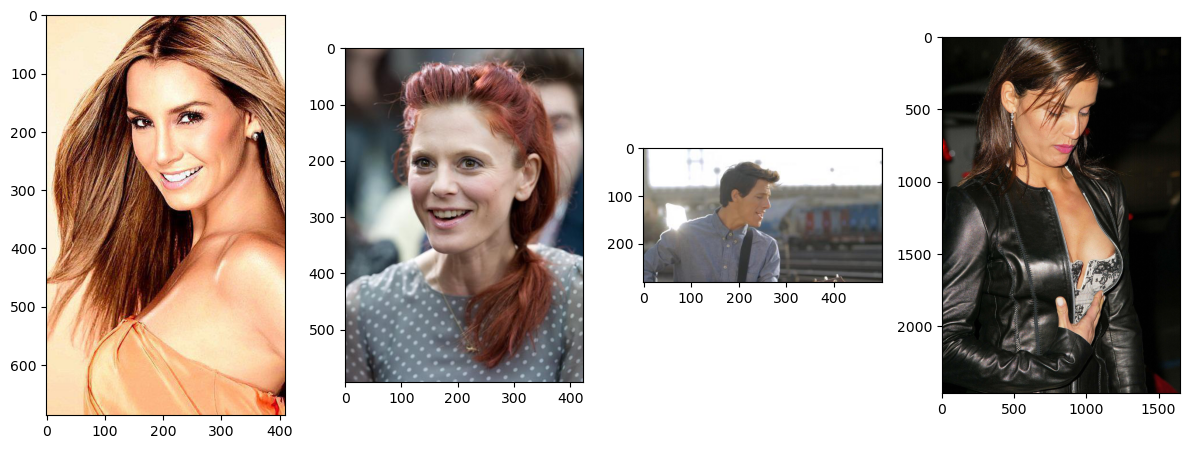

In [9]:
plt.figure(figsize = (12,12))

for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(photos_path + image_names[i])
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
plt.show()

In [8]:
def load_images(photos_path, LIMIT):
    data = []
    paths = glob.glob(f"{photos_path}*.jpg")[:LIMIT]
    
    images = [cv2.imread(file) for file in paths]
    
    for img in images:
        try:
            img_array = img_to_array(img)
            data.append(img_array)
        except:
            None
            
    return data

In [58]:
start = time.time()
data = load_images(photos_path, LIMIT)
end = time.time()

print(f'{end - start}s')

4.8732969760894775s


In [26]:
image_data = np.array(data,dtype=object,)
labels = np.array(labels,dtype=object,)

In [27]:
train_size = 0.6


x_train, x_rem, y_train, y_rem = train_test_split(image_data, labels, train_size=train_size, random_state = 101, shuffle=True)

x_valid, x_test, y_valid, y_test = train_test_split(x_rem,y_rem, test_size=0.5)

ValueError: Found input variables with inconsistent numbers of samples: [2000, 1000]

In [28]:
print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)

(600,)
(200,)
(200,)


In [35]:
@jit(target_backend='cuda')                         
def func2(a):
    for i in range(10000000):
        a[i]+= 1
        
func2(a)

In [59]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0
